### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-10/triple"

MODE = "triple"

### From here; automatic run

In [4]:
if not root.endswith("/"):
    root += "/"

In [5]:
sep_category = "$" # separates categories like date, experiments, etc
sep_count = "%" # separated the number of hairs by experiment

In [6]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241210$IHNY$25%phosctrl$25% pk30 0.01$25%pk30 0.03$25%pk30 0.05$triple.txt
20241210$IHNY$25%phosctrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$triple.txt


In [7]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [8]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)
        df = plotting.get_df_from_file(root + file,
                                       skip=2)

        # clean the df
        if MODE in file:
            df = plotting.clean_single(df)
        else:
            raise ValueError(f"Not a {MODE} experiment")
        
        splitted_name = file.split(sep_category)
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[2:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split(sep_count)
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

20241210$IHNY$25%phosctrl$25% pk30 0.01$25%pk30 0.03$25%pk30 0.05$triple.txt
20241210$IHNY$25%phosctrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$triple.txt


,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,TOTAL WORK,TOUGHNESS,Name
0,1.0,3067.8,65.0,76.0,51.4,3.608000e+09,36.84,2.97,0.01206,38.25,...,0.01302,0.002760,23.25,2.890,44.42,56.35,0.01837,0.005534,58910000.0,phosctrl
1,2.0,4936.9,81.0,91.7,68.5,3.392000e+09,56.35,3.30,0.01217,61.84,...,0.01311,0.004365,26.31,3.745,50.41,88.60,0.01795,0.009987,66790000.0,phosctrl
2,3.0,5538.7,87.4,97.2,72.6,3.380000e+09,63.54,3.43,0.01230,70.14,...,0.01321,0.004899,25.11,5.403,48.19,107.80,0.01946,0.011050,66420000.0,phosctrl
3,4.0,3855.4,70.9,77.6,63.3,3.736000e+09,48.52,3.17,0.01222,48.77,...,0.01307,0.003452,25.15,3.374,48.48,72.00,0.01867,0.007685,65870000.0,phosctrl
4,5.0,3750.0,71.8,85.9,55.6,4.148000e+09,51.92,2.85,0.01247,48.79,...,0.01325,0.003492,26.85,3.298,51.67,74.00,0.01973,0.008405,73390000.0,phosctrl


Statistical significance between phosctrl and  kp 0.05: p = 0.0171
Statistical significance between pk30 0.05 and  kp 0.05: p = 0.0155


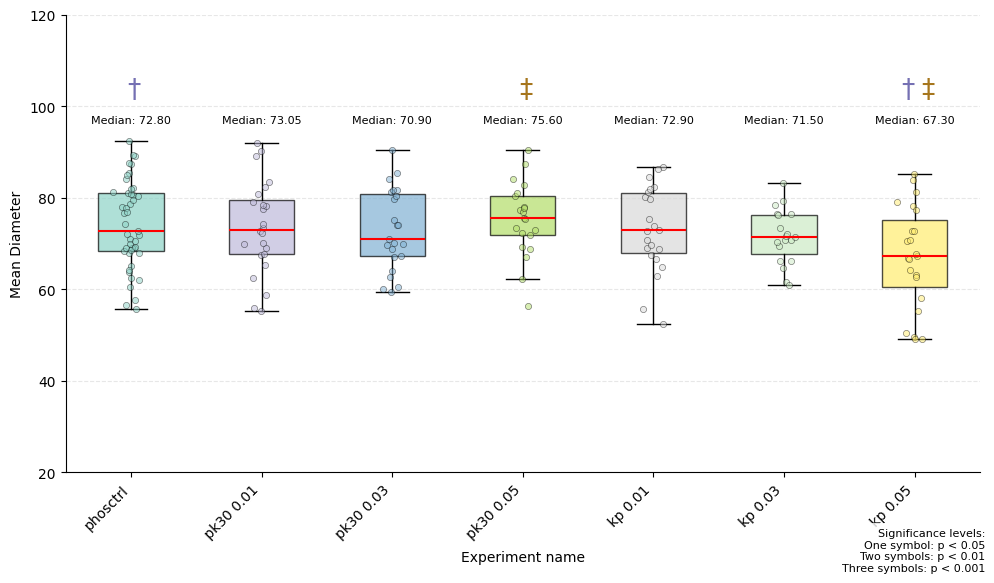

In [9]:
header = 'MEAN DIAMETER'
ymin = 20
ymax = 120
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

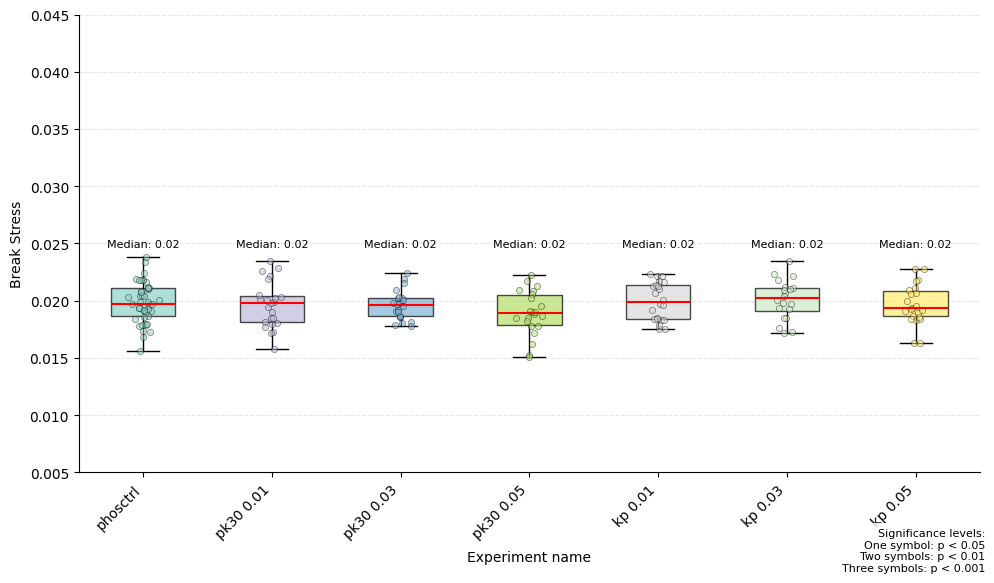

In [10]:
header = 'BREAK STRESS'
ymin = 0.005
ymax = 0.045
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

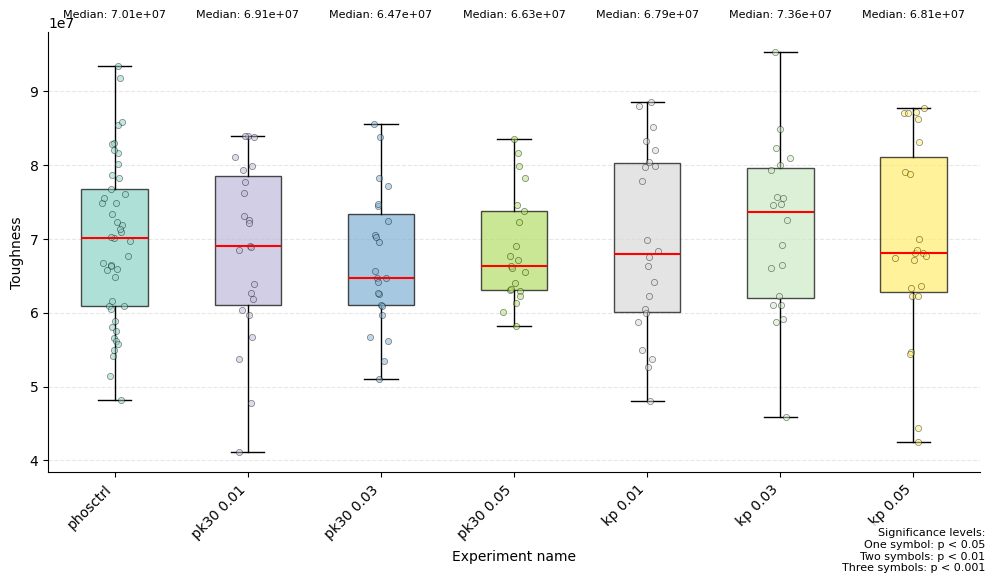

In [11]:
header = 'TOUGHNESS'
ymin = None
ymax = None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

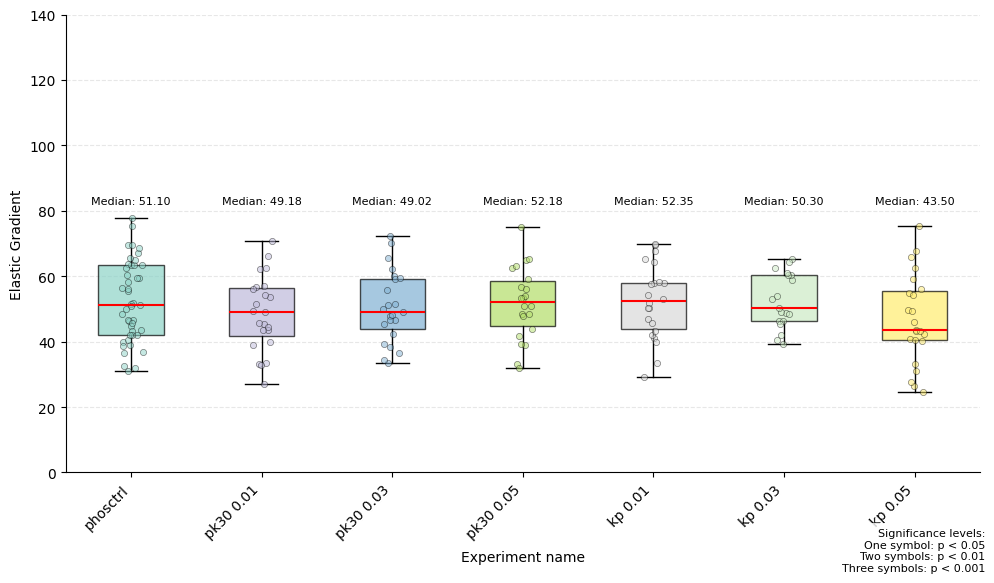

In [12]:
header = 'ELASTIC GRADIENT'
ymin = 0
ymax =  140
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between phosctrl and  kp 0.01: p = 0.0181
Statistical significance between phosctrl and kp 0.03: p = 0.0009
Statistical significance between phosctrl and  kp 0.05: p = 0.0013
Statistical significance between  pk30 0.01 and  kp 0.01: p = 0.0166
Statistical significance between  pk30 0.01 and kp 0.03: p = 0.0024
Statistical significance between  pk30 0.01 and  kp 0.05: p = 0.0019
Statistical significance between pk30 0.03 and kp 0.03: p = 0.0194
Statistical significance between pk30 0.03 and  kp 0.05: p = 0.0187
Statistical significance between pk30 0.05 and  kp 0.05: p = 0.0399


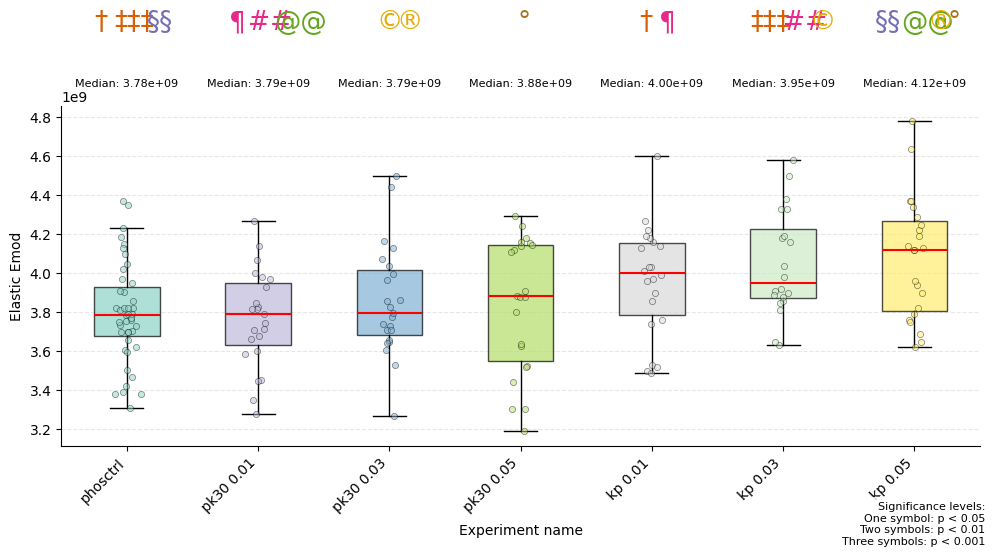

In [13]:
header = 'ELASTIC EMOD'
ymin = None
ymax =  None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()